In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

def filter_vec(df, name):
    x = proc[proc.name == name + ":vector"] #.filter(["vectime","vecvalue"])
    return pd.DataFrame(index=x.vectime.values[0], data={name : x.vecvalue.values[0]})
    
    

# Caso Dc - Recursos

In [32]:
# Cargamos los datos
targetDcRec = pd.read_csv("targetDc.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Sacamos solo los vectores
proc = targetDcRec[targetDcRec.type == "vector"]
proc

# Con más runs, merging por aquí

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
97,targetDc-0-20240612-20:55:21-5826,vector,BigNet.dc.resourceManager,allocatedVms:vector,NaN,None,NaN,"[70.767204948763, 70.77390832896, 70.947743826...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
100,targetDc-0-20240612-20:55:21-5826,vector,BigNet.dc.resourceManager,allocatedCores:vector,NaN,None,NaN,"[70.767204948763, 70.77390832896, 70.947743826...","[2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 1..."
103,targetDc-0-20240612-20:55:21-5826,vector,BigNet.dc.resourceManager,allocatedRam:vector,NaN,None,NaN,"[70.767204948763, 70.77390832896, 70.947743826...","[4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0,..."
107,targetDc-0-20240612-20:55:21-5826,vector,BigNet.dc.resourceManager,allocatedDisk:vector,NaN,None,NaN,"[70.767204948763, 70.77390832896, 70.947743826...","[500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0..."


In [59]:
pdc_res = dict()

pdc_res["vms"] = filter_vec(proc, "allocatedVms")
pdc_res["ram"] = filter_vec(proc, "allocatedRam")
pdc_res["disk"] = filter_vec(proc, "allocatedDisk")
pdc_res["cpu"] = filter_vec(proc, "allocatedCores")

## Gráficas

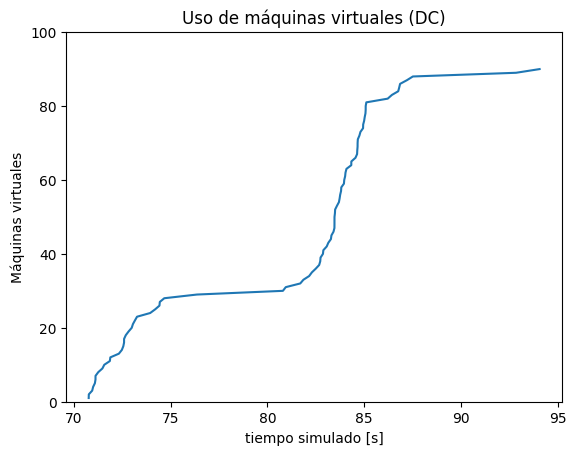

In [60]:
plt.title("Uso de máquinas virtuales (DC)")
plt.ylabel("Máquinas virtuales")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.ylim(0,100)
plt.plot(pdc_res["vms"])
plt.show()

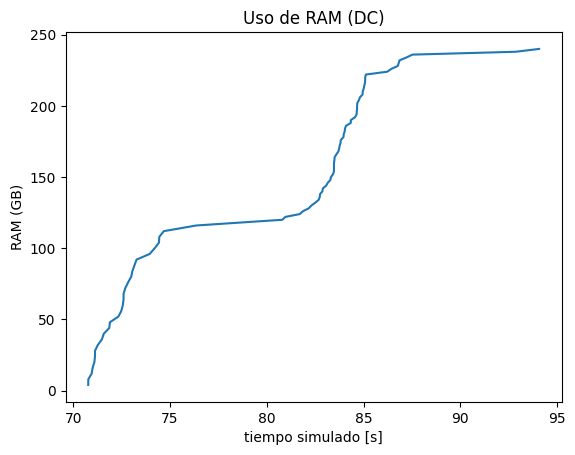

In [61]:
plt.title("Uso de RAM (DC)")
plt.ylabel("RAM (GB)")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.plot(pdc_res["ram"])
plt.show()

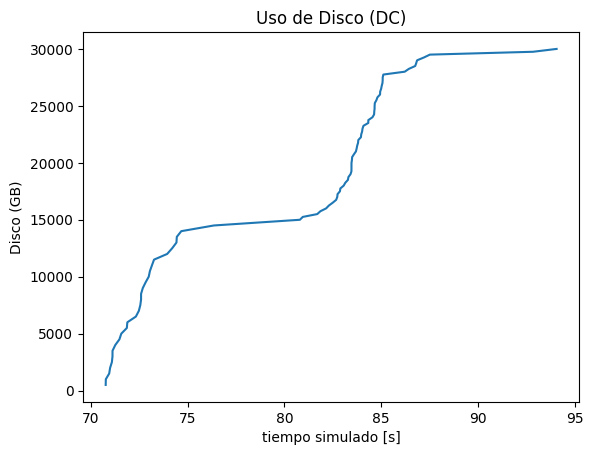

In [62]:
plt.title("Uso de Disco (DC)")
plt.ylabel("Disco (GB)")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.plot(pdc_res["disk"])
plt.show()

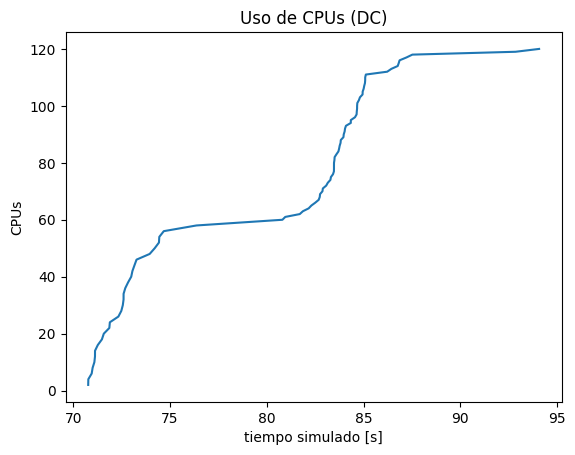

In [63]:
plt.title("Uso de CPUs (DC)")
plt.ylabel("CPUs")
plt.xlabel("tiempo simulado [s]")

#plt.xlim(0,3600)
plt.plot(pdc_res["cpu"])
plt.show()

# Caso Fog - Recursos

In [65]:
# Cargamos los datos
targetFogRec = pd.read_csv("targetFog.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Sacamos solo los vectores
proc = targetFogRec[targetFogRec.type == "vector"]
#proc

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
111,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgC1.resourceManager,allocatedVms:vector,NaN,None,NaN,"[70.553242564695, 70.885987720393, 71.72599700...","[1.0, 2.0, 3.0, 4.0, 5.0]"
114,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgC1.resourceManager,allocatedCores:vector,NaN,None,NaN,"[70.553242564695, 70.885987720393, 71.72599700...","[2.0, 4.0, 6.0, 8.0, 10.0]"
117,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgC1.resourceManager,allocatedRam:vector,NaN,None,NaN,"[70.553242564695, 70.885987720393, 71.72599700...","[4.0, 8.0, 12.0, 16.0, 20.0]"
121,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgC1.resourceManager,allocatedDisk:vector,NaN,None,NaN,"[70.553242564695, 70.885987720393, 71.72599700...","[500.0, 1000.0, 1500.0, 2000.0, 2500.0]"
125,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgE1.resourceManager,allocatedVms:vector,NaN,None,NaN,"[70.593190362979, 70.755376706112, 71.46482000...","[1.0, 2.0, 3.0, 4.0, 5.0]"
128,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgE1.resourceManager,allocatedCores:vector,NaN,None,NaN,"[70.593190362979, 70.755376706112, 71.46482000...","[2.0, 4.0, 6.0, 8.0, 10.0]"
131,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgE1.resourceManager,allocatedRam:vector,NaN,None,NaN,"[70.593190362979, 70.755376706112, 71.46482000...","[4.0, 8.0, 12.0, 16.0, 20.0]"
135,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgE1.resourceManager,allocatedDisk:vector,NaN,None,NaN,"[70.593190362979, 70.755376706112, 71.46482000...","[500.0, 1000.0, 1500.0, 2000.0, 2500.0]"
139,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgD1.resourceManager,allocatedVms:vector,NaN,None,NaN,"[70.595158847017, 70.924700614751, 71.68190264...","[1.0, 2.0, 3.0, 4.0, 5.0]"
142,targetFog-0-20240612-20:57:09-6213,vector,BigNet.fgD1.resourceManager,allocatedCores:vector,NaN,None,NaN,"[70.595158847017, 70.924700614751, 71.68190264...","[2.0, 4.0, 6.0, 8.0, 10.0]"
